In [1]:
import os
import math
import numpy as np
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import seaborn
from scipy.stats import multivariate_normal
from scipy.stats import stats
from scipy.stats import nct
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import chisquare
from scipy.integrate import nquad
from scipy import stats
#from RegscorePy import *
from scipy.linalg import cholesky
from scipy.optimize import root

FiguresLoc = os.getcwd() + r'\\Figures\\'

In [2]:
#read in data
enpStocks = pd.read_csv(os.getcwd() + r'\\E&P_AdjClose.csv', index_col=0)
enpStocks.index = pd.to_datetime(enpStocks.index, format = '%m/%d/%Y'); enpStocks.head()

COG      CXO      EOG      MRO
Date                                           
2020-01-01  0.859260  0.58506  0.56940  0.98008
2020-01-02  0.776290  0.44169  0.36624  0.14611
2020-01-03  0.812370  0.96698  0.91763  0.75578
2020-01-04  0.018114  0.48249  0.55826  0.48883
2020-01-05  0.896890  0.57498  0.44053  0.87181

In [3]:
#tranform to log-return space
cogRet = enpStocks['COG']
mroRet = enpStocks['MRO']
cxoRet = enpStocks['CXO']
eogRet = enpStocks['EOG']

In [4]:
#separate pairs into training and testing periods
cog_train = cogRet
cog_test = cogRet
mro_train = mroRet
mro_test = mroRet
cxo_train = cxoRet
cxo_test = cxoRet
eog_train = eogRet
eog_test = eogRet

Text(0, 0.5, 'Enron Oil & Gas')

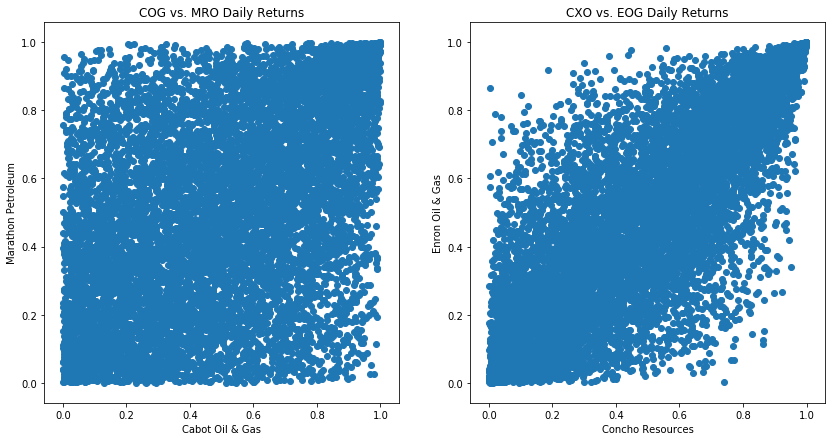

In [5]:
#what the pairs actually look like jointly in daily returns space, clearly not normal

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.scatter(cog_train, mro_train)
plt.title('COG vs. MRO Daily Returns')
plt.xlabel('Cabot Oil & Gas')
plt.ylabel('Marathon Petroleum')

plt.subplot(1,2,2)
plt.scatter(cxo_train, eog_train)
plt.title('CXO vs. EOG Daily Returns')
plt.xlabel('Concho Resources')
plt.ylabel('Enron Oil & Gas')

In [6]:
#stats on empirical distributions for 5 year training period

cog_stats = [cog_train.mean(), cog_train.std(), cog_train.skew(), cog_train.kurtosis()]
mro_stats = [mro_train.mean(), mro_train.std(), mro_train.skew(), mro_train.kurtosis()]
cxo_stats = [cxo_train.mean(), cxo_train.std(), cxo_train.skew(), cxo_train.kurtosis()]
eog_stats = [eog_train.mean(), eog_train.std(), eog_train.skew(), eog_train.kurtosis()]

empirical_table = pd.DataFrame({'COG': cog_stats, 'MRO': mro_stats, 'CXO': cxo_stats, 'EOG': eog_stats}, index=['Mean', 'St Dev', 'Skewness', 'Kurtosis']); empirical_table

COG       MRO       CXO       EOG
Mean      0.502223  0.502222  0.496687  0.498129
St Dev    0.289662  0.288487  0.289076  0.289786
Skewness -0.023644 -0.012276  0.006157  0.014582
Kurtosis -1.207501 -1.202074 -1.202289 -1.209349

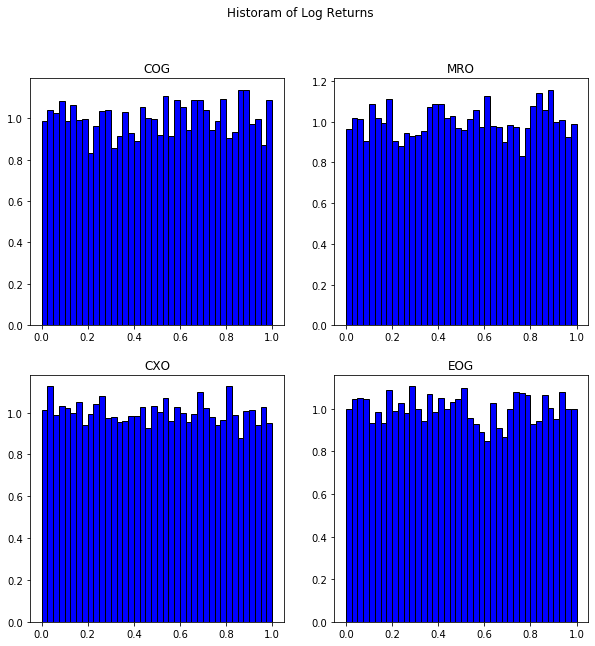

In [7]:
#visualization of empirical distributions for 5 year training period

fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(10)
plt.suptitle('Historam of Log Returns')
axs[0, 0].hist(np.asarray(cog_train), density=True, color='blue', edgecolor='black', bins=40)
axs[0, 0].set_title('COG')
axs[0, 1].hist(np.asarray(mro_train), density=True, color='blue', edgecolor='black', bins=40)
axs[0, 1].set_title('MRO')
axs[1, 0].hist(np.asarray(cxo_train), density=True, color='blue', edgecolor='black', bins=40)
axs[1, 0].set_title('CXO')
axs[1, 1].hist(np.asarray(eog_train), density=True, color='blue', edgecolor='black', bins=40)
axs[1, 1].set_title('EOG')
plt.show()

In [8]:
#fit marginals to skewed stu t

fit_cog = nct.fit(cog_train)
fit_mro = nct.fit(mro_train)
fit_cxo = nct.fit(cxo_train)
fit_eog = nct.fit(eog_train)

fit_table = pd.DataFrame({'COG': fit_cog, 'MRO': fit_mro, 'CXO': fit_cxo, 'EOG': fit_eog}, index=['DF', 'Skew', 'Loc', 'Scale']); fit_table

C:\Users\azl6s5v\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\azl6s5v\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1682: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
C:\Users\azl6s5v\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5335: RuntimeWarning: overflow encountered in multiply
  trm1 /= np.asarray(fac1*sc.gamma((n+1)/2))
C:\Users\azl6s5v\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5337: RuntimeWarning: overflow encountered in multiply
  trm2 /= np.asarray(np.sqrt(fac1)*sc.gamma(n/2+1))
C:\Users\azl6s5v\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5338: RuntimeWarning: invalid value encountered in multiply
  Px *= trm1+trm2


COG         MRO         CXO         EOG
DF     339.839459  339.836504  339.918479  339.933937
Skew    10.306266   10.441059    5.851175    4.783662
Loc     -2.279243   -2.298278   -1.155299   -0.866501
Scale    0.269289    0.267630    0.281713    0.284640

In [9]:
#calculate kendall's tau for each pair during formulation period
tau_pair1 = stats.kendalltau(cog_train, mro_train)[0]
tau_pair2 = stats.kendalltau(cxo_train, eog_train)[0]

tau_table = pd.DataFrame({'COG/MRO': tau_pair1, 'CXO/EOG': tau_pair2}, index=['Kendalls Tau']); tau_table

COG/MRO   CXO/EOG
Kendalls Tau  0.319688  0.605917

In [10]:
#define copula parameters in terms of relationship with kendall's tau

def clayton_param(tau):
    return 2 * tau / (1 - tau)

def gumbel_param(tau):
    return 1 / (1 - tau)

def elliptic_param(tau):
    return math.sin(tau * math.pi / 2)

def get_params(tau):
    return [clayton_param(tau), gumbel_param(tau), elliptic_param(tau)]

In [11]:
params_pair1 = get_params(tau_pair1)
params_pair2 = get_params(tau_pair2)

param_table = pd.DataFrame({'COG/MRO': params_pair1, 'CXO/EOG': params_pair2}, index=['Claytons', 'Gumbel', 'Gauss and t4']); param_table

COG/MRO   CXO/EOG
Claytons      0.939826  3.075073
Gumbel        1.469913  2.537537
Gauss and t4  0.481324  0.814445

In [12]:
# cdf(x, df, nc, loc=0, scale=1)

def get_cdf(rets, fit):
    return nct.cdf(rets, fit[0], fit[1], loc=fit[2], scale=fit[3])

In [13]:
#pairs u and v in training period

u1_train = get_cdf(cog_train, fit_cog)
v1_train = get_cdf(mro_train, fit_mro)
u2_train = get_cdf(cxo_train, fit_cxo)
v2_train = get_cdf(eog_train, fit_eog)

In [14]:
#define clayton and gumbel copula pdfs

def clayton_pdf(u, v, theta):
    return (theta + 1) * (u**-theta + v**-theta - 1)**(-2 - 1 / theta) * u**(-theta - 1) * v**(-theta - 1)

def gumbel_pdf(u, v, theta):
    C = np.exp(-((-np.log(u))**theta + (-np.log(v))**theta)**(1/theta))
    A = (-np.log(u))**theta + (-np.log(v))**theta
    return C * (u * v)**-1 * A**(-2 + 2 / theta) * (np.log(u) * np.log(v))**(theta - 1) * (1 + (theta - 1) * A**(-1 / theta))

In [15]:
# random sample generation from elliptical copulas

def bivarnorm_rvs(rho, size, nct_params1, nct_params2):
    corr = np.ones([2, 2]) * rho
    for i, j in zip(range(2), range(2)):
        corr[i, j] = 1
    upper_chol = cholesky(corr)

    rndN = norm.rvs(size=[size, 2])
    variatesNormal = np.dot(rndN, upper_chol)

    copNorm = norm.cdf(variatesNormal)

    skewt1 = nct.ppf(copNorm[:, 0], nct_params1[0], nct_params1[1], loc=nct_params1[2], scale=nct_params1[3])
    skewt2 = nct.ppf(copNorm[:, 1], nct_params2[0], nct_params2[1], loc=nct_params2[2], scale=nct_params2[3])
    
    return [skewt1, skewt2]

def bivart_rvs(rho, size, nct_params1, nct_params2, m=4):
    corr = np.ones([2, 2]) * rho
    for i, j in zip(range(2), range(2)):
        corr[i, j] = 1
    upper_chol = cholesky(corr)

    rndT = t.rvs(size=[size, 2], df=m)
    variatesT = np.dot(rndT, upper_chol)

    copT = t.cdf(variatesT, df=m)

    skewt1 = nct.ppf(copT[:, 0], nct_params1[0], nct_params1[1], loc=nct_params1[2], scale=nct_params1[3])
    skewt2 = nct.ppf(copT[:, 1], nct_params2[0], nct_params2[1], loc=nct_params2[2], scale=nct_params2[3])
    
    return [skewt1, skewt2]

In [16]:
#AIC

def get_arch_aic(u, v, theta):
    return -2 * np.log(clayton_pdf(u, v, theta[0])).sum() + 2, -2 * np.log(gumbel_pdf(u, v, theta[1])).sum() + 2

def get_ellip_aic(theta, size, nct_params1, nct_params2, true1, true2):
    x1 = bivarnorm_rvs(theta[2], size, nct_params1, nct_params2)
    x2 = bivart_rvs(theta[2], size, nct_params1, nct_params2)
    gauss_aic = (abs(x1[0][:] - true1) + abs(x1[1][:] - true2)).sum() * -2 + 2
    t_aic = (abs(x2[0][:] - true1) + abs(x2[1][:] - true2)).sum() * -2 + 2*2
    return gauss_aic, t_aic

def get_aic(u, v, theta, size, nct_params1, nct_params2, true1, true2):
    clayton_aic, gumbel_aic = get_arch_aic(u, v, theta)
    gauss_aic, t_aic = get_ellip_aic(theta, size, nct_params1, nct_params2, true1, true2)
    return [clayton_aic, gumbel_aic, gauss_aic, t_aic]

In [17]:
aic_cog_mro = get_aic(u1_train, v1_train, params_pair1, len(cog_train), fit_cog, fit_mro, cog_train, mro_train)
aic_cxo_eog = get_aic(u2_train, v2_train, params_pair2, len(cxo_train), fit_cxo, fit_eog, cxo_train, eog_train)

aic_table = pd.DataFrame({'COG/MRO': aic_cog_mro, 'CXO/EOG': aic_cxo_eog}, index=['Clayon', 'Gumbel', 'Gaussian', 'Students t4']); aic_table

COG/MRO       CXO/EOG
Clayon       -1606.930863  -6236.468041
Gumbel       -2903.078835 -11188.138014
Gaussian    -13312.050644 -13395.334307
Students t4 -13281.153577 -13407.374973

In [18]:
#Gumbel wins, using for testing period

In [19]:
#pairs u and v in testing period

u1_test = get_cdf(cog_test, fit_cog)
v1_test = get_cdf(mro_test, fit_mro)
u2_test = get_cdf(cxo_test, fit_cxo)
v2_test = get_cdf(eog_test, fit_eog)

In [20]:
# gumbel cdf

def gumbel_cdf(u, v, theta):
    return np.exp(-((-np.log(u))**theta + (-np.log(v))**theta)**(1/theta))

In [21]:
#gumbel conditional cdf

def gumbel_cond_cdf(u, v, theta):
    C_u_v = gumbel_cdf(u, v, theta) * ((-np.log(u))**theta + (-np.log(v))**theta)**((1 - theta) / theta) * (-np.log(v))**(theta - 1) * (1 / v)
    C_v_u = gumbel_cdf(u, v, theta) * ((-np.log(u))**theta + (-np.log(v))**theta)**((1 - theta) / theta) * (-np.log(u))**(theta - 1) * (1 / u)
    return C_u_v, C_v_u

In [22]:
theta1 = params_pair1[1]
theta2 = params_pair2[1]
theta1, theta2

(1.4699130755948884, 2.5375365641759093)

In [23]:
#run the testing series through conditional cdf calc
MI1_u_v, MI1_v_u = gumbel_cond_cdf(u1_test, v1_test, theta1)
MI2_u_v, MI2_v_u = gumbel_cond_cdf(u2_test, v2_test, theta2)

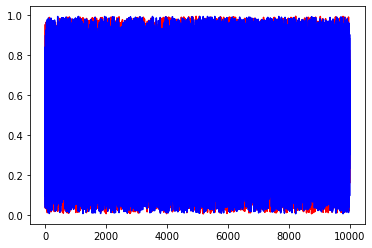

In [24]:
plt.plot(np.arange(0, len(cog_test), 1), MI1_u_v, color='red')
plt.plot(np.arange(0, len(mro_test), 1), MI1_v_u, color='blue')
plt.show()

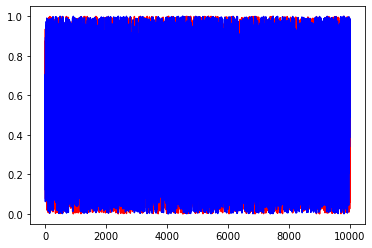

In [25]:
plt.plot(np.arange(0, len(cxo_test), 1), MI2_u_v, color='red')
plt.plot(np.arange(0, len(eog_test), 1), MI2_v_u, color='blue')
plt.show()

In [44]:
#copula trade algo

def SimulateCopulaAlgo(data, MI_u_v, MI_v_u, notional, tradeTrigger, rollingWindow=252):
    stock1 = data.columns[0]
    stock2 = data.columns[1]
    upper = tradeTrigger
    lower = 1 - tradeTrigger
    shares1 = 'Shares ' + stock1
    shares2 = 'Shares ' + stock2
    return1 = 'Daily Ret ' + stock1
    return2 = 'Daily Ret ' + stock2
    data['Daily Ret ' + stock1] = np.log(data[stock1]).diff().dropna()
    data['Daily Ret ' + stock2] = np.log(data[stock2]).diff().dropna()
    data['Hedge Ratio'] = 1#data[return1].corr(data[return2]) * data[return1].std() / data[return2].std()
    data['MI(u|v)'] = MI_u_v
    data['MI(v|u)'] = MI_v_u
    data['Signal'] = ""
    data[shares1] = ""
    data[shares2] = ""
    
    setsig = 0
    for i, row in data.iterrows():
        if row['MI(u|v)'] >= upper and row['MI(v|u)'] <= lower:
            setsig = -1
        elif row['MI(u|v)'] <= lower and row['MI(v|u)'] >= upper:
            setsig = 1
        else:
            setsig = 0
        data.at[i, 'Signal'] = setsig
        shs = round(setsig * notional / row[stock1], 0)
        data.at[i, shares1] = shs
        data.at[i, shares2] = round(-shs * row[stock1] * row['Hedge Ratio'] / row[stock2], 0)
    
    #calc pnl
    pnl1 = "PnL " + stock1
    pnl2 = "PnL " + stock2
    data[pnl1] = ((data[stock1].shift(-1) - data[stock1]) * data[shares1]).shift(1)
    data[pnl2] = ((data[stock2].shift(-1) - data[stock2]) * data[shares2]).shift(1)

    return data

                COG      MRO  Daily Ret COG  Daily Ret MRO  Hedge Ratio  \
Date                                                                      
2047-05-14  0.37165  0.36419      -0.987500      -1.002733            1   
2047-05-15  0.56365  0.18401       0.416481      -0.682686            1   
2047-05-16  0.69275  0.88032       0.206236       1.565295            1   
2047-05-17  0.18171  0.37068      -1.338257      -0.864946            1   
2047-05-18  0.56688  0.38993       1.137736       0.050628            1   

             MI(u|v)   MI(v|u) Signal Shares COG Shares MRO PnL COG PnL MRO  
Date                                                                         
2047-05-14  0.416144  0.398240      0          0         -0      -0       0  
2047-05-15  0.793980  0.097026      0          0         -0       0       0  
2047-05-16  0.455377  0.902291      0          0         -0       0      -0  
2047-05-17  0.160778  0.520269      0          0         -0      -0       0  
2047-0

Text(0, 0.5, 'MRO')

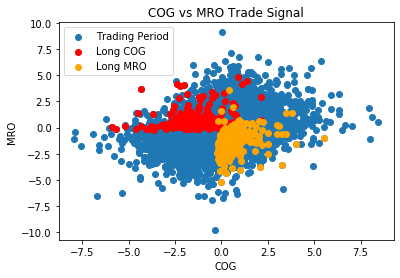

In [46]:
#COG vs. MRO
notional = 10000
stock1 = 'COG'
stock2 = 'MRO'
data = pd.concat([enpStocks[stock1][:], enpStocks[stock2][:]], axis=1, keys=[stock1, stock2])
tradeTrigger = 0.95
res = SimulateCopulaAlgo(data, MI1_u_v, MI1_v_u, notional, tradeTrigger)
print(res.tail())
print("Total PnL " + stock1 + " = " + str(res["PnL " + stock1].sum()))
print("Total PnL " + stock2 + " = " + str(res["PnL " + stock2].sum()))
res.to_csv(os.getcwd() + r'\\Pair1CopulaSimulationResults.csv')

plt.scatter(res["Daily Ret " + stock1], res["Daily Ret " + stock2])
buyStock1 = res.loc[res['Signal'] == 1]
plt.scatter(buyStock1["Daily Ret " + stock1], buyStock1["Daily Ret " + stock2], Color = "red")
sellStock1 = res.loc[res['Signal'] == -1]
plt.scatter(sellStock1["Daily Ret " + stock1], sellStock1["Daily Ret " + stock2], Color = "orange")
plt.title(stock1 + " vs " + stock2 + " Trade Signal")
plt.legend(['Trading Period', "Long " + stock1, "Long " + stock2, '-2'])
plt.xlabel(stock1)
plt.ylabel(stock2)

                CXO      EOG  Daily Ret CXO  Daily Ret EOG  Hedge Ratio  \
Date                                                                      
2047-05-14  0.34024  0.44821       0.204227       0.312492            1   
2047-05-15  0.94240  0.90131       1.018779       0.698587            1   
2047-05-16  0.39231  0.65848      -0.876377      -0.313915            1   
2047-05-17  0.39116  0.79423      -0.002936       0.187439            1   
2047-05-18  0.54270  0.46176       0.327440      -0.542328            1   

             MI(u|v)   MI(v|u) Signal Shares CXO Shares EOG  PnL CXO  PnL EOG  
Date                                                                           
2047-05-14  0.265583  0.695630      0          0         -0        0       -0  
2047-05-15  0.775905  0.489067      0          0         -0        0       -0  
2047-05-16  0.088771  0.940889      0          0         -0       -0        0  
2047-05-17  0.025962  0.989948      1      25565     -12591       -0      

Text(0, 0.5, 'EOG')

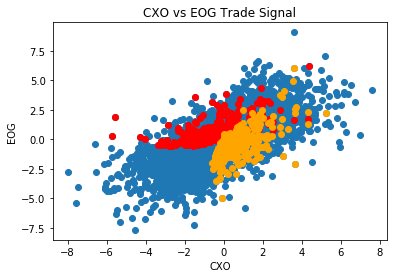

In [47]:
#CXO vs. EOG
notional = 10000
stock1 = 'CXO'
stock2 = 'EOG'
data = pd.concat([enpStocks[stock1][:], enpStocks[stock2][:]], axis=1, keys=[stock1, stock2])
tradeTrigger = 0.95

res = SimulateCopulaAlgo(data, MI2_u_v, MI2_v_u, notional, tradeTrigger)
print(res.tail())
print("Total PnL " + stock1 + " = " + str(res["PnL " + stock1].sum()))
print("Total PnL " + stock2 + " = " + str(res["PnL " + stock2].sum()))
res.to_csv(os.getcwd() + r'\\Pair2CopulaSimulationResults.csv')

plt.scatter(res["Daily Ret " + stock1], res["Daily Ret " + stock2])
buyStock1 = res.loc[res['Signal'] == 1]
plt.scatter(buyStock1["Daily Ret " + stock1], buyStock1["Daily Ret " + stock2], Color = "red")
sellStock1 = res.loc[res['Signal'] == -1]
plt.scatter(sellStock1["Daily Ret " + stock1], sellStock1["Daily Ret " + stock2], Color = "orange")
plt.title(stock1 + " vs " + stock2 + " Trade Signal")
plt.xlabel(stock1)
plt.ylabel(stock2)

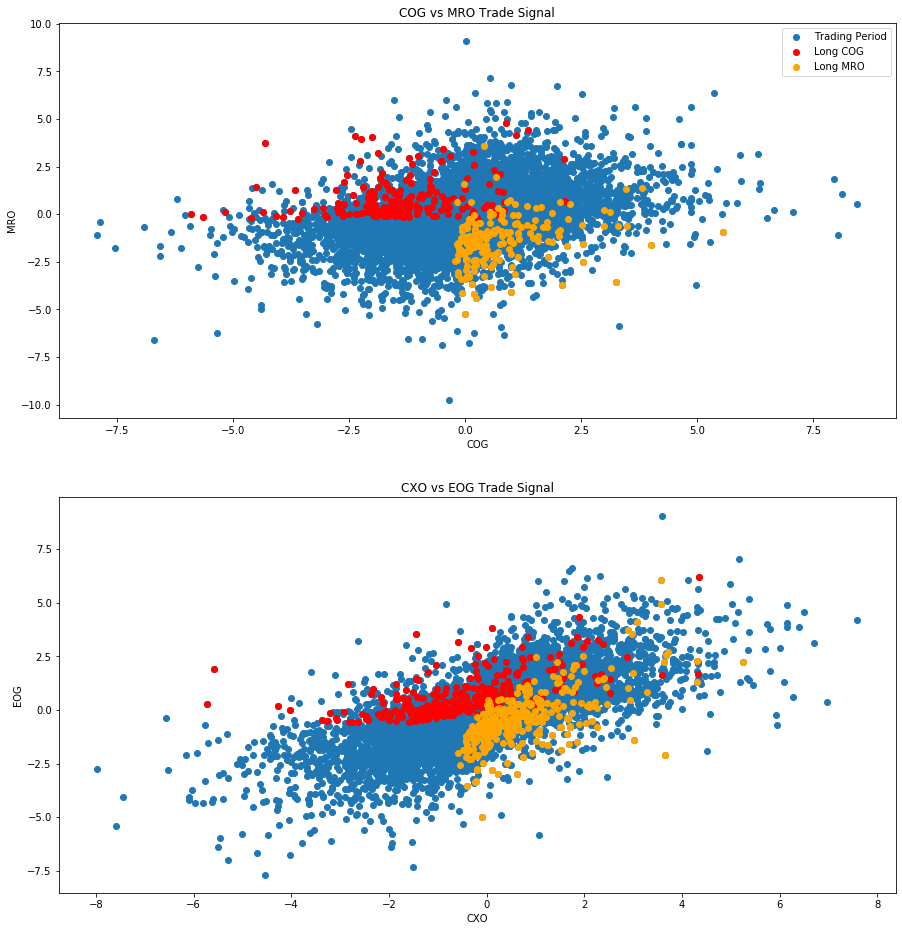

In [48]:
#COG vs. MRO
notional = 10000
stock1 = 'COG'
stock2 = 'MRO'
data = pd.concat([enpStocks[stock1][:], enpStocks[stock2][:]], axis=1, keys=[stock1, stock2])
tradeTrigger = 0.95
res = SimulateCopulaAlgo(data, MI1_u_v, MI1_v_u, notional, tradeTrigger)

plt.figure(figsize=(15,16))
plt.subplot(2,1,1)
plt.scatter(res["Daily Ret " + stock1], res["Daily Ret " + stock2])
buyStock1 = res.loc[res['Signal'] == 1]
plt.scatter(buyStock1["Daily Ret " + stock1], buyStock1["Daily Ret " + stock2], Color = "red")
sellStock1 = res.loc[res['Signal'] == -1]
plt.scatter(sellStock1["Daily Ret " + stock1], sellStock1["Daily Ret " + stock2], Color = "orange")
plt.title(stock1 + " vs " + stock2 + " Trade Signal")
plt.legend(['Trading Period', "Long " + stock1, "Long " + stock2, '-2'])
plt.xlabel(stock1)
plt.ylabel(stock2)


#CXO vs. EOG
notional = 10000
stock1 = 'CXO'
stock2 = 'EOG'
data = pd.concat([enpStocks[stock1][:], enpStocks[stock2][:]], axis=1, keys=[stock1, stock2])
tradeTrigger = 0.95
res = SimulateCopulaAlgo(data, MI2_u_v, MI2_v_u, notional, tradeTrigger)

plt.subplot(2,1,2)
plt.scatter(res["Daily Ret " + stock1], res["Daily Ret " + stock2])
buyStock1 = res.loc[res['Signal'] == 1]
plt.scatter(buyStock1["Daily Ret " + stock1], buyStock1["Daily Ret " + stock2], Color = "red")
sellStock1 = res.loc[res['Signal'] == -1]
plt.scatter(sellStock1["Daily Ret " + stock1], sellStock1["Daily Ret " + stock2], Color = "orange")
plt.title(stock1 + " vs " + stock2 + " Trade Signal")
plt.xlabel(stock1)
plt.ylabel(stock2)
plt.savefig('CopulaSimulatedResult.png')

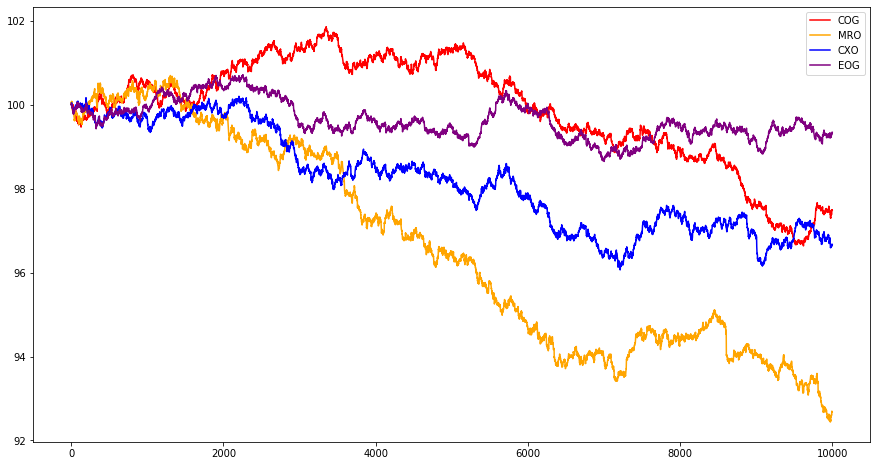

In [49]:
copSims = enpStocks
copSims['cogsim'] = nct.ppf(copSims['COG'], 3.955232799442509, 0.062225211255520545, loc=-0.0015817476000228512, scale=0.01571554138387888)
copSims['mrosim'] = nct.ppf(copSims['MRO'], 3.1719275874252126, -0.17613490895159817, loc=0.0035944209990231247, scale=0.018989311009719335)
copSims['cxosim'] = nct.ppf(copSims['CXO'], 4.403837784862494, -0.2805201678245418, loc=0.006001743642228193, scale=0.017657796627197127)
copSims['eogsim'] = nct.ppf(copSims['EOG'], 4.546937597273587, -0.05599597096181681, loc=0.0010541064759504834, scale=0.014732827144459958)

copSims['cogidx'] = np.log(np.exp(copSims['cogsim']))
copSims['mroidx'] = np.log(np.exp(copSims['mrosim']))
copSims['cxoidx'] = np.log(np.exp(copSims['cxosim']))
copSims['eogidx'] = np.log(np.exp(copSims['eogsim']))

copSims['COGpx'] = 100 * (1 + copSims['cogidx'] / 100).cumprod()
copSims['MROpx'] = 100 * (1 + copSims['mroidx'] / 100).cumprod()
copSims['CXOpx'] = 100 * (1 + copSims['cxoidx'] / 100).cumprod()
copSims['EOGpx'] = 100 * (1 + copSims['eogidx'] / 100).cumprod()

dataSimple = copSims[['COGpx', 'MROpx','CXOpx','EOGpx']]
t = np.arange(10000)

plt.figure(figsize=(15,8))
plt.plot(t, dataSimple['COGpx'], 'red', t, dataSimple['MROpx'], 'orange', t, dataSimple['CXOpx'], 'blue', t, dataSimple['EOGpx'], 'purple')
plt.legend(['COG', 'MRO', 'CXO', 'EOG'])